In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\BHARATH N\Downloads\loan_default.csv')

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df['Default'].value_counts())

Shape: (255347, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  obj

In [4]:
df.drop(columns=['LoanID'], inplace=True)

In [5]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [7]:
X = df.drop('Default', axis=1)
y = df['Default']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.885725474838457
[[44957   182]
 [ 5654   277]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.60      0.05      0.09      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



In [12]:
import joblib
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [16]:
sample_raw = {
    'Age': 19,
    'Income': 8000,
    'LoanAmount': 25000,
    'CreditScore': 400,
    'MonthsEmployed': 1,
    'NumCreditLines': 0,
    'InterestRate': 25,
    'LoanTerm': 72,
    'DTIRatio': 0.9,
    'Education': 'High School',         # Assuming 'High School' was encoded as 1
    'EmploymentType': 'Unemployed',    # Assuming 'Unemployed' is 2
    'MaritalStatus': 'Single',     # Assuming 'Single' is 1
    'HasMortgage': 'No',       # 'No' is 0
    'HasDependents': 'Yes',     # 'Yes' is 1
    'LoanPurpose': 'Other',       # Assuming 'Debt Consolidation' is 3
    'HasCoSigner': 'No' 
}
for col in categorical_cols:
    if sample_raw[col] in encoders[col].classes_:
        sample_raw[col] = encoders[col].transform([sample_raw[col]])[0]
    else:
        raise ValueError(f"Value '{sample_raw[col]}' not seen in training data for column '{col}'")
sample_input = pd.DataFrame([sample_raw])

sample_input_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_input_scaled)

print("Predicted Default Status:", prediction[0])
prediction_proba = model.predict_proba(sample_input_scaled)
print("Prediction Probability:", prediction_proba)

Predicted Default Status: 1
Prediction Probability: [[0.36 0.64]]


In [17]:
import joblib

joblib.dump(model, 'credit_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']

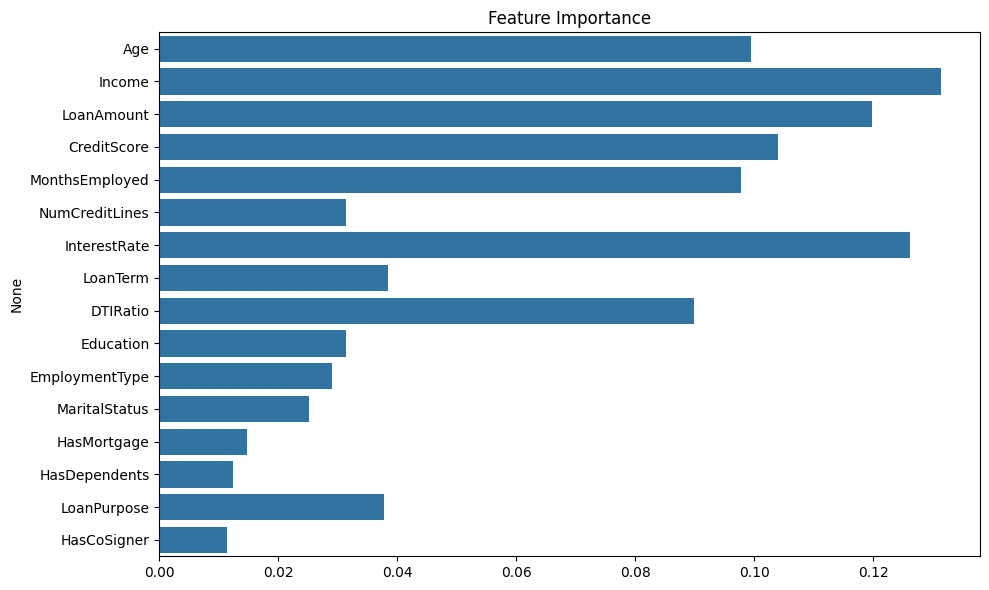

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [19]:
df.to_csv('loan_data.csv', index=False)